In [120]:
# !pip install openai

In [117]:
# %env OPENAI_API_KEY=sk-XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

In [121]:
import os
import pandas as pd
import matplotlib.pyplot as plt
# import openai

# openai.api_key = os.getenv("OPENAI_API_KEY")

In [96]:
# def make_request(prompt, model="text-davinci-001"):

#   response = openai.Completion.create(
#     engine=model,
#     prompt=prompt,
#     temperature=0.0,
#     max_tokens=50,
#     top_p=1,
#     frequency_penalty=0,
#     presence_penalty=0
#   )

#   raw_ans = response.choices[0].text

#   return raw_ans

In [103]:
models = {
          # GPT-3 sizes are based on https://blog.eleuther.ai/gpt3-model-sizes/
          "text-ada-001": 350_000_000, 
          "text-babbage-001": 1_300_000_000, 
          "text-curie-001": 6_700_000_000, 
          "text-davinci-001": 175_000_000_000 
          }

In [56]:
# df = pd.read_csv('./word_counting_dataset.csv')

In [102]:
# df.head()

In [63]:
# for model in models.keys():
#   model_responses = []
#   for _, row in df.iterrows():
#     prompt = row.prompt

#     raw_answer = make_request(prompt, model)
#     model_responses.append(raw_answer)

#   df[model + '-response'] = model_responses

In [101]:
# df.head()

In [65]:
# df.to_csv('world_counting_response.csv')

In [100]:
# len(df)

In [91]:
# answer_col = df['answer'].to_numpy()
# model_answer_col = df['text-davinci-001-response'].to_numpy()
# classification_results = []
# for index in range(len(df)):
#   true_answer_set = list(answer_col[index].split(','))
#   model_answer_set = set(model_answer_col[index].split())

#   clf = False 

#   for answer_key in true_answer_set:
#     if answer_key in model_answer_set:
#       clf = True 
  
#   classification_results.append(clf)

# df['text-davinci-001-classification'] = classification_results

In [97]:
# df.tail()

In [93]:
# df.to_csv('world_counting_results.csv')

In [98]:
df = pd.read_csv('./world_counting_results.csv')

In [105]:
df.head(1)

,Unnamed: 0,Unnamed: 0.1,prompt,answer,text-ada-001-response,text-babbage-001-response,text-curie-001-response,text-davinci-001-response,text-ada-001-classification,text-babbage-001-classification,text-curie-001-classification,text-davinci-001-classification
0,0,0,Q: Count the number of letters in the word 'en...,"7,seven",\n\nThere are nine letters in England.,\n\nThere are nine letters in the word 'england'.,\n\nThere are 36 letters in the word 'England'.,\n\nThere are six letters in the word 'england'.,False,False,False,False


In [106]:
total = len(df)
total

518

In [107]:
model_results = {}

In [112]:
model_results['text-ada-001'] =  df['text-ada-001-classification'].to_numpy().sum() / total
model_results['text-babbage-001'] =  df['text-babbage-001-classification'].to_numpy().sum() / total
model_results['text-curie-001'] =  df['text-curie-001-classification'].to_numpy().sum() / total
model_results['text-davinci-001'] =  df['text-davinci-001-classification'].to_numpy().sum() / total

In [113]:
model_results

{'text-ada-001': 0.07142857142857142,
 'text-babbage-001': 0.011583011583011582,
 'text-curie-001': 0.019305019305019305,
 'text-davinci-001': 0.07528957528957529}

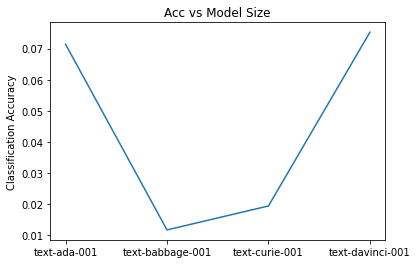

In [134]:
plt.title('Acc vs Model Size')
plt.ylabel('Classification Accuracy')
# plt.xlabel('GPT-3 Models')
plt.plot(list(models.keys()), list(model_results.values()))
plt.show()